# **📊 Body Measurements Analysis Report**

## **1. Introduction**
  This report analyzes anthropometric data of male and female participants.

## **2. Load and Clean Data**

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import skew, kurtosis, spearmanr

# Load datasets
male = np.genfromtxt("nhanes_adult_male_bmx_2020.csv", delimiter=",", skip_header=1)
female = np.genfromtxt("nhanes_adult_female_bmx_2020.csv", delimiter=",", skip_header=1)

# Clean data: remove rows with NaNs or zeros in critical columns (weight, height, waist, hip)
def clean_data(data):
    mask = (
        ~np.isnan(data[:, 0]) & (data[:, 0] > 0) &  # Weight
        ~np.isnan(data[:, 1]) & (data[:, 1] > 0) &  # Height
        ~np.isnan(data[:, 5]) & (data[:, 5] > 0) &  # Hip circumference
        ~np.isnan(data[:, 6]) & (data[:, 6] > 0)    # Waist circumference
    )
    return data[mask]

male = clean_data(male)
female = clean_data(female)

print("Cleaned Male shape:", male.shape)
print("Cleaned Female shape:", female.shape)

Cleaned Male shape: (4081, 7)
Cleaned Female shape: (4221, 7)


## **3. Visualize Female and Male Weight Distributions**

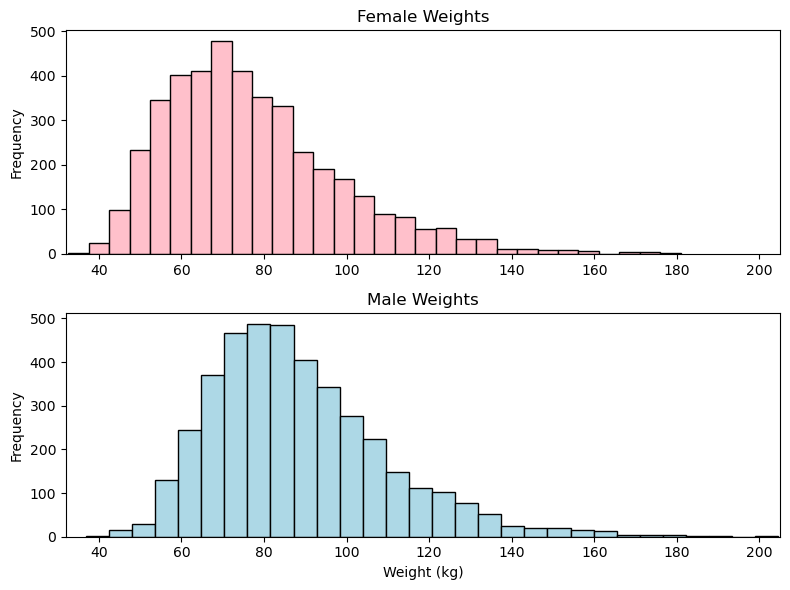

In [27]:
# Extract weights
male_weights = male[:, 0]
female_weights = female[:, 0]

# Set common x-axis limits
all_weights = np.concatenate([male_weights, female_weights])
x_min, x_max = np.floor(all_weights.min()), np.ceil(all_weights.max())

# Plot histograms
plt.figure(figsize=(8, 6))

plt.subplot(2, 1, 1)
plt.hist(female_weights, bins=30, color="pink", edgecolor="black")
plt.title("Female Weights")
plt.xlim(x_min, x_max)
plt.ylabel("Frequency")

plt.subplot(2, 1, 2)
plt.hist(male_weights, bins=30, color="lightblue", edgecolor="black")
plt.title("Male Weights")
plt.xlim(x_min, x_max)
plt.xlabel("Weight (kg)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

## **4. Compare Male and Female Weights with Boxplot**

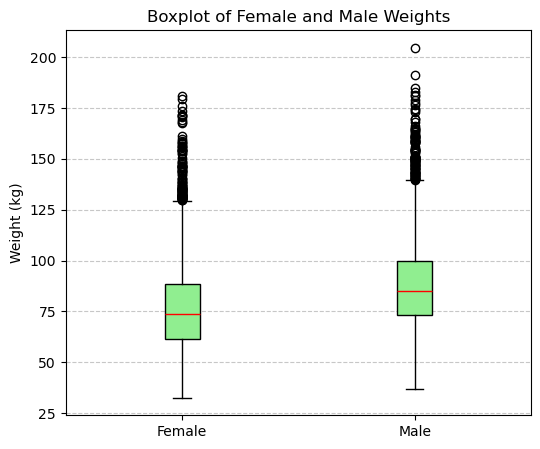

In [28]:
plt.figure(figsize=(6, 5))
plt.boxplot([female_weights, male_weights],
            tick_labels=["Female", "Male"],
            patch_artist=True,
            boxprops=dict(facecolor="lightgreen", color="black"),
            medianprops=dict(color="red"))

plt.title("Boxplot of Female and Male Weights")
plt.ylabel("Weight (kg)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## **5. Compute Basic Numerical Aggregates**

In [29]:
def describe(data):
    return {
        "Mean": np.mean(data),
        "Median": np.median(data),
        "Std Dev": np.std(data),
        "Variance": np.var(data),
        "Min": np.min(data),
        "Max": np.max(data),
        "Range": np.ptp(data),
        "Skewness": skew(data),
        "Kurtosis": kurtosis(data)
    }

male_stats = describe(male_weights)
female_stats = describe(female_weights)

print("Male Weight Statistics:\n", male_stats)
print("\nFemale Weight Statistics:\n", female_stats)

Male Weight Statistics:
 {'Mean': np.float64(88.36454300416565), 'Median': np.float64(85.0), 'Std Dev': np.float64(21.418936717962495), 'Variance': np.float64(458.770850128082), 'Min': np.float64(36.8), 'Max': np.float64(204.6), 'Range': np.float64(167.8), 'Skewness': np.float64(0.9842810741662347), 'Kurtosis': np.float64(1.4742884754078238)}

Female Weight Statistics:
 {'Mean': np.float64(77.40379057095475), 'Median': np.float64(73.6), 'Std Dev': np.float64(21.54250829019315), 'Variance': np.float64(464.07966343304065), 'Min': np.float64(32.6), 'Max': np.float64(180.9), 'Range': np.float64(148.3), 'Skewness': np.float64(1.03336107186799), 'Kurtosis': np.float64(1.4009683480659731)}


## **6. Add BMI to Female Dataset**

In [30]:
heights_m_female = female[:, 1] / 100
bmi_female = female[:, 0] / (heights_m_female ** 2)
female_with_bmi = np.column_stack((female, bmi_female))

## **7. Standardize Female Dataset**

In [31]:
means = np.mean(female, axis=0)
stds = np.std(female, axis=0)
zfemale = (female - means) / stds

## **8. Scatterplot Matrix and Correlations**

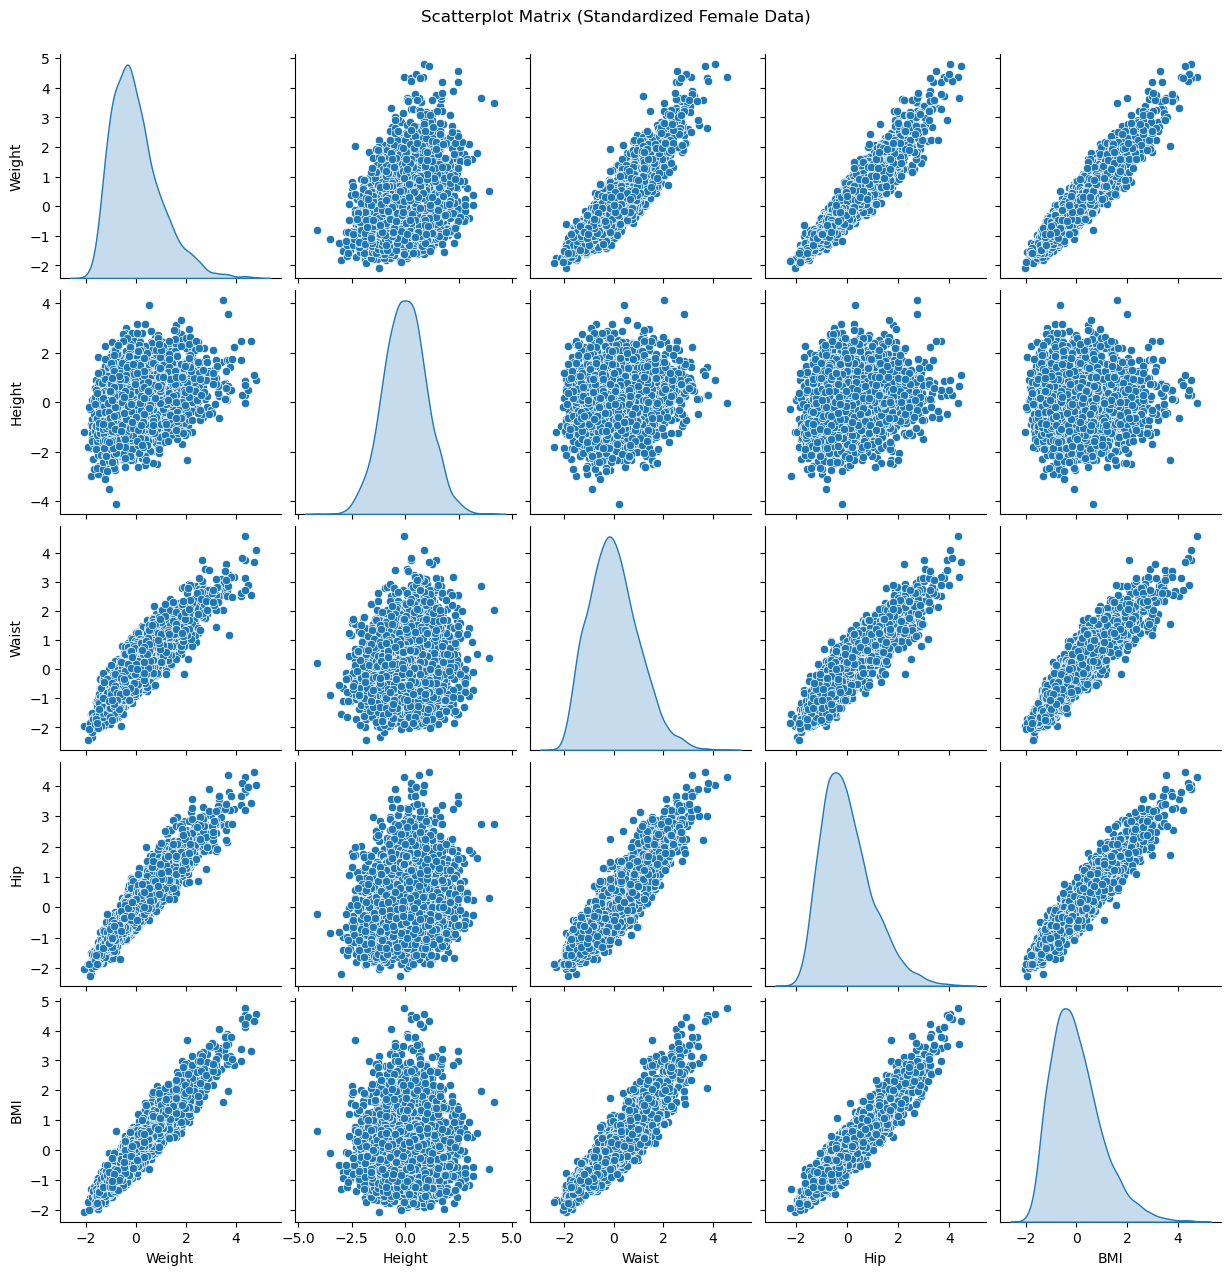

Pearson Correlation Matrix:
           Weight    Height     Waist       Hip       BMI
Weight  1.000000  0.345496  0.904550  0.946553  0.945900
Height  0.345496  1.000000  0.126547  0.202895  0.033077
Waist   0.904550  0.126547  1.000000  0.897407  0.921198
Hip     0.946553  0.202895  0.897407  1.000000  0.944199
BMI     0.945900  0.033077  0.921198  0.944199  1.000000

Spearman Correlation Matrix:
           Weight    Height     Waist       Hip       BMI
Weight  1.000000  0.338860  0.900169  0.946634  0.937999
Height  0.338860  1.000000  0.108587  0.205405  0.019897
Waist   0.900169  0.108587  1.000000  0.888037  0.923114
Hip     0.946634  0.205405  0.888037  1.000000  0.934196
BMI     0.937999  0.019897  0.923114  0.934196  1.000000


In [32]:
# Standardize BMI
bmi_female_z = (bmi_female - bmi_female.mean()) / bmi_female.std()

# Create DataFrame
df = pd.DataFrame(np.column_stack((
    zfemale[:, 0],  # Weight
    zfemale[:, 1],  # Height
    zfemale[:, 6],  # Waist circumference
    zfemale[:, 5],  # Hip circumference
    bmi_female_z    # BMI
)), columns=["Weight", "Height", "Waist", "Hip", "BMI"])

# Pairplot
sns.pairplot(df, diag_kind="kde")
plt.suptitle("Scatterplot Matrix (Standardized Female Data)", y=1.02)
plt.show()

# Correlations
print("Pearson Correlation Matrix:\n", df.corr(method="pearson"))
print("\nSpearman Correlation Matrix:\n", df.corr(method="spearman"))

## **9. Compute Ratios and Add Columns**

In [33]:
# Female ratios
female_whtr = female[:, 6] / female[:, 1]
female_whr = female[:, 6] / female[:, 5]
female_ratios = np.column_stack((female_with_bmi, female_whtr, female_whr))

# Male ratios
male_whtr = male[:, 6] / male[:, 1]
male_whr = male[:, 6] / male[:, 5]
male_ratios = np.column_stack((male, male_whtr, male_whr))

## **10. Compare Ratios with Boxplot**

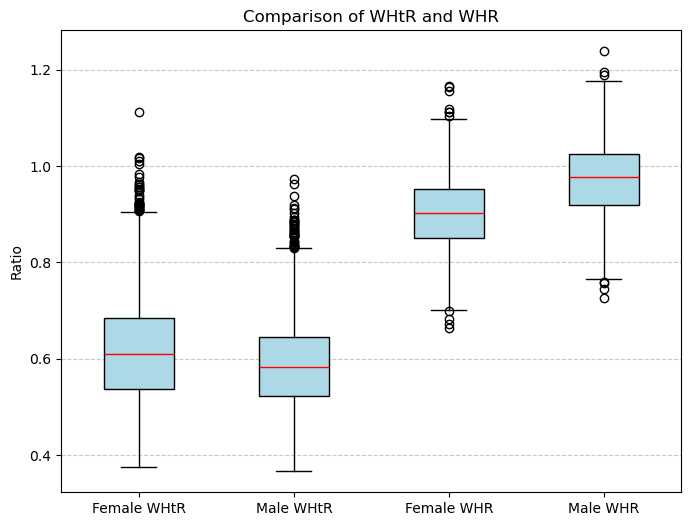

In [34]:
plt.figure(figsize=(8, 6))
plt.boxplot(
    [female_whtr, male_whtr, female_whr, male_whr],
    tick_labels=["Female WHtR", "Male WHtR", "Female WHR", "Male WHR"],
    patch_artist=True,
    boxprops=dict(facecolor="lightblue", color="black"),
    medianprops=dict(color="red")
)
plt.title("Comparison of WHtR and WHR")
plt.ylabel("Ratio")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## **11. Advantages and Disadvantages**
| Metric   | Advantages                                     | Disadvantages                                    |
|----------|-----------------------------------------------|--------------------------------------------------|
| **BMI**  | Easy to calculate, population-level indicator | Does not account for fat distribution/muscle mass |
| **WHtR** | Better predictor of central obesity           | Measurement error possible                       |
| **WHR**  | Indicates fat distribution                    | Less reliable in very obese individuals          |

## **12. Extreme BMI Analysis**

In [35]:
bmi_sorted_indices = np.argsort(bmi_female)
extreme_indices = np.concatenate([bmi_sorted_indices[:5], bmi_sorted_indices[-5:]])
print("Standardized data for extreme BMI values:\n", zfemale[extreme_indices])

Standardized data for extreme BMI values:
 [[-2.07978523 -1.22299143 -1.5478402  -1.16905675 -2.1947611  -2.0405496
  -1.94212128]
 [-1.88017988 -0.18929313 -1.71835247  0.38637892 -2.4443617  -1.85491922
  -2.05708015]
 [-1.53667299  1.80730222  0.62619127  0.5730312  -2.26607556 -1.6756899
  -1.7064556 ]
 [-1.843044   -0.26009438 -0.22637009  0.51081377 -2.30173278 -2.25178417
  -1.85590213]
 [-1.61094475  0.88688592 -0.09848588  0.47970506 -2.21258971 -1.82931504
  -1.71220354]
 [ 4.2472403   0.29215539  1.86240524 -0.98240447  2.3693641   4.10445598
   3.81731803]
 [ 4.45612963  0.50455915  1.69189297 -1.13794804  3.34993787  3.98283607
   2.90339503]
 [ 4.34936397  0.27799514  2.84285081  1.94181459  4.36616887  3.9188256
   3.75409065]
 [ 4.8042785   0.88688592  2.11817365  1.81737973  3.77782461  4.02124236
   4.08172343]
 [ 4.36328993 -0.03353037 -0.05585782 -0.17357792  2.77942222  4.31569054
   4.57029862]]


# 📊 Summary

### **📂 Anthropometric Analysis Workflow**

#### 1️⃣ Load male and female CSV data into NumPy matrices
male    <- nhanes_adult_male_bmx_2020.csv
female  <- nhanes_adult_female_bmx_2020.csv

#### 2️⃣ Clean datasets:
#####   Remove rows with NaNs or zero in critical columns (weight, height, hip, waist)
male_clean    = clean_data(male)
female_clean  = clean_data(female)

#### 3️⃣ Plot histograms:
    - Female weights (top)
    - Male weights (bottom)
    - Set identical x-axis limits using matplotlib.pyplot.xlim

#### 4️⃣ Boxplot:
    - Compare male and female weights side-by-side

#### 5️⃣ Compute descriptive stats:
    - Mean, median, std dev, variance, min, max, skewness, kurtosis
    - Compare male vs female weights

#### 6️⃣ Add BMI to female matrix:
    - BMI = weight / (height in meters)^2
    - Append as 8th column

## 7️⃣ Standardize female matrix (z-scores):
    - zfemale = (female - mean) / std

#### 8️⃣ Scatterplot matrix:
    - For z-standardized: weight, height, waist, hip, BMI
    - Compute Pearson’s and Spearman’s correlations for all pairs

#### 9️⃣ Add waist ratios:
    - WHtR = waist / height
    - WHR  = waist / hip
    - Append as new columns to male and female matrices

#### 🔟 Boxplot:
    - Compare WHtR and WHR for male & female (4 boxes side-by-side)

#### 1️⃣1️⃣ Discuss metrics:
    - Advantages and disadvantages of BMI, WHtR, WHR

#### 1️⃣2️⃣ Extreme BMI analysis:
     - Print standardized measurements for 5 lowest + 5 highest BMI females
     - Use numpy.argsort to identify rows
